<a href="https://colab.research.google.com/github/Yunjinhwan1/AIFFEL_EXPLORATION/blob/main/project01_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

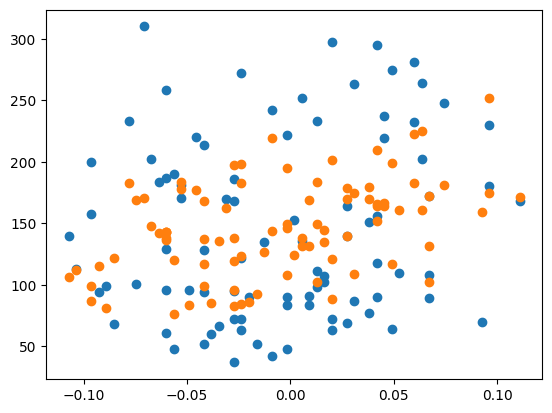

In [55]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

COUNT = 10
LEARNING_RATE = 0.1

diabetes=load_diabetes()

df_X = diabetes['data']
df_y = diabetes['target']

X = np.array(diabetes['data']) # 굳이 왜 하라는지 모르겠어요
y = np.array(diabetes['target']) # 굳이 왜 하라는지 모르겠어요

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model(X, W, b):
    predictions = 0
    for i in range(COUNT):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

W = np.random.rand(COUNT)
b = np.random.rand()

losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    #if i % 10 == 0:
    #  print('Iteration %d : Loss %0.4f' % (i, L))

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
#mse

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()